In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [13]:
full_trains = pd.read_csv('../data/full_trains.csv')

In [14]:
full_trains.columns

Index(['year', 'month', 'service', 'departure_station', 'arrival_station',
       'journey_time_avg', 'total_num_trips', 'num_of_canceled_trains',
       'comment_cancellations', 'num_late_at_departure',
       'avg_delay_late_at_departure', 'avg_delay_all_departing',
       'comment_delays_at_departure', 'num_arriving_late',
       'avg_delay_late_on_arrival', 'avg_delay_all_arriving',
       'comment_delays_on_arrival', 'delay_cause_external_cause',
       'delay_cause_rail_infrastructure', 'delay_cause_traffic_management',
       'delay_cause_rolling_stock', 'delay_cause_station_management',
       'delay_cause_travelers', 'num_greater_15_min_late',
       'avg_delay_late_greater_15_min', 'num_greater_30_min_late',
       'num_greater_60_min_late'],
      dtype='object')

In [31]:
trains0 = full_trains[['service','delay_cause_external_cause', 'delay_cause_rail_infrastructure', 'delay_cause_traffic_management', 'delay_cause_rolling_stock', 'delay_cause_station_management', 'delay_cause_travelers']]

In [16]:
full_trains.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,NaN,10,...,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0


In [17]:
trains_paris_17 = full_trains[full_trains.departure_station == "PARIS EST"]
trains_paris_17 = trains_paris_17[trains_paris_17.year == 2017]
trains_paris_17 = trains_paris_17[trains_paris_17.month == 9]

<AxesSubplot:xlabel='journey_time_avg', ylabel='avg_delay_late_on_arrival'>

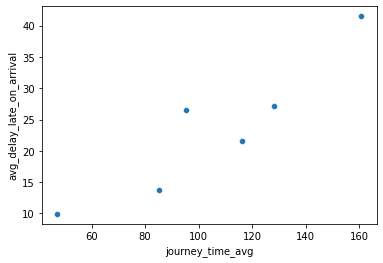

In [18]:
sns.scatterplot(data=trains_paris_17[['journey_time_avg', 'avg_delay_late_on_arrival']], x='journey_time_avg', y='avg_delay_late_on_arrival')

<BarContainer object of 2 artists>

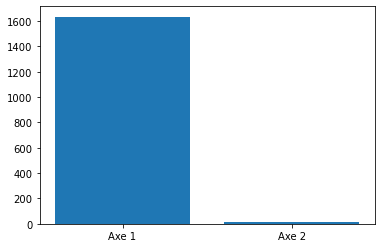

In [19]:
cls = PCA(n_components=2)
pcs = cls.fit_transform(trains_paris_17[['journey_time_avg', 'avg_delay_late_on_arrival']])
plt.bar(["Axe 1", "Axe 2"], cls.explained_variance_)

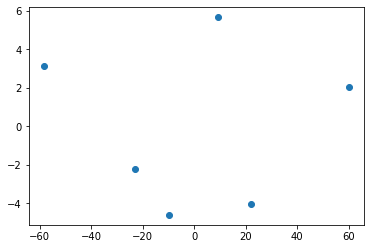

In [20]:
plt.scatter(pcs[:, 0], pcs[:, 1])

In [21]:
pcs

array([[ 22.10343785,  -4.02665403],
       [ -9.94085282,  -4.5989322 ],
       [-22.88708517,  -2.21764959],
       [  9.13488764,   5.66001968],
       [ 59.85819505,   2.05580033],
       [-58.26858254,   3.12741582]])

In [22]:
full_trains['departure_station'].unique()

array(['PARIS EST', 'REIMS', 'PARIS LYON', 'CHAMBERY CHALLES LES EAUX',
       'LYON PART DIEU', 'MONTPELLIER', 'MULHOUSE VILLE',
       'PARIS MONTPARNASSE', 'BORDEAUX ST JEAN', 'LA ROCHELLE VILLE',
       'POITIERS', 'VANNES', 'LILLE', 'ANGERS SAINT LAUD', 'DOUAI',
       'MACON LOCHE', 'MARSEILLE ST CHARLES', 'NANCY', 'PARIS NORD',
       'PERPIGNAN', 'RENNES', 'SAINT ETIENNE CHATEAUCREUX',
       'ST PIERRE DES CORPS', 'VALENCE ALIXAN TGV', 'LAVAL', 'NANTES',
       'QUIMPER', 'TOULOUSE MATABIAU', 'ZURICH', 'METZ', 'AVIGNON TGV',
       'LE MANS', 'ITALIE', 'BESANCON FRANCHE COMTE TGV', 'NIMES',
       'ANGOULEME', 'ST MALO', 'TOURS', 'ARRAS', 'STUTTGART', 'GENEVE',
       'DIJON VILLE', 'TOULON', 'DUNKERQUE', 'BELLEGARDE (AIN)', 'BREST',
       'ANNECY', 'GRENOBLE', 'LE CREUSOT MONTCEAU MONTCHANIN',
       'FRANCFORT', 'STRASBOURG', 'LAUSANNE', 'AIX EN PROVENCE TGV',
       'NICE VILLE', 'TOURCOING', 'MARNE LA VALLEE', 'PARIS VAUGIRARD',
       'BARCELONA', 'MADRID'], dtype=object

<AxesSubplot:xlabel='avg_delay_late_at_departure', ylabel='avg_delay_late_on_arrival'>

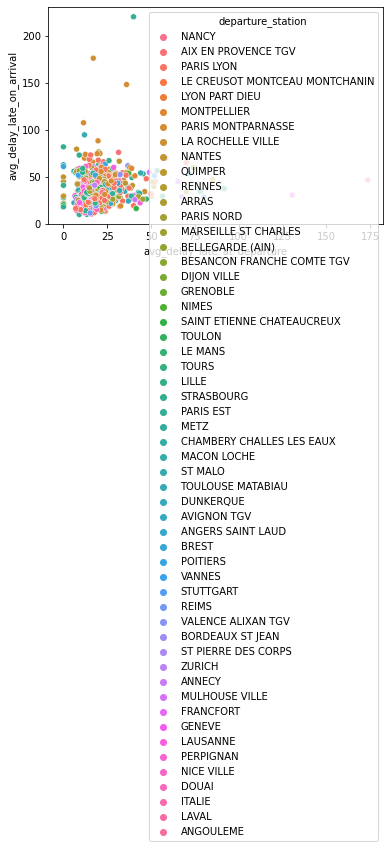

In [23]:
sns.scatterplot(x='avg_delay_late_at_departure', y='avg_delay_late_on_arrival', data=full_trains[full_trains.year == 2016], hue='departure_station')

In [24]:
full_trains.melt(id_vars=['year','departure_station', 'journey_time_avg'])

,year,departure_station,journey_time_avg,variable,value
0,2017,PARIS EST,85.133779,month,9
1,2017,REIMS,47.064516,month,9
2,2017,PARIS EST,116.234940,month,9
3,2017,PARIS LYON,161.089583,month,9
4,2017,PARIS LYON,164.452632,month,9
...,...,...,...,...,...
131083,2018,ANGOULEME,130.690840,num_greater_60_min_late,1.0
131084,2018,TOULOUSE MATABIAU,263.584270,num_greater_60_min_late,1.0
131085,2018,PARIS MONTPARNASSE,78.931818,num_greater_60_min_late,1.0
131086,2018,PARIS MONTPARNASSE,89.436893,num_greater_60_min_late,0.0


<AxesSubplot:xlabel='year', ylabel='journey_time_avg'>

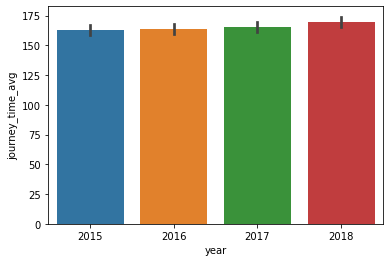

In [25]:
sns.barplot(x='year', y='journey_time_avg', data=full_trains)

In [26]:
full_trains[full_trains['departure_station'].str.contains('PARIS')]

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
5,2017,9,National,PARIS LYON,BESANCON FRANCHE COMTE TGV,128.521053,191,1,NaN,18,...,0.111111,0.111111,0.222222,0.500000,0.000000,0.055556,15.0,35.796667,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,2018,9,NaN,PARIS LYON,MACON LOCHE,95.624365,199,2,NaN,36,...,0.034483,0.103448,0.103448,0.586207,0.137931,0.034483,19.0,4.629188,9.0,3.0
5455,2018,9,NaN,PARIS MONTPARNASSE,LA ROCHELLE VILLE,171.231481,216,0,NaN,33,...,0.000000,0.529412,0.058824,0.235294,0.000000,0.176471,9.0,1.981481,1.0,0.0
5456,2018,9,NaN,PARIS MONTPARNASSE,POITIERS,99.136268,477,0,NaN,65,...,0.037037,0.425926,0.277778,0.240741,0.000000,0.018519,22.0,3.091055,4.0,0.0
5459,2018,9,NaN,PARIS MONTPARNASSE,TOURS,78.931818,176,0,NaN,24,...,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0


In [27]:
full_trains.service.unique()

array(['National', 'International', nan], dtype=object)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy import linalg
from sklearn.decomposition import PCA


def scatterplot_pca(
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, **kwargs
):
    """Diagramme de dispersion dans le premier plan principal.

    Permet d'afficher un diagramme de dispersion lorsque les données
    ont plus de deux dimensions. L'argument `columns` spécifie la
    liste des colonnes à utiliser pour la PCA dans le jeu de données
    `data`. Les arguments `style` et `hue` permettent de spécifier la
    forme et la couleur des marqueurs. Les arguments `pc1` et `pc2`
    permettent de sélectionner les composantes principales (par défaut
    la première et deuxième). Retourne l'objet `Axes` ainsi que le
    modèle `PCA` utilisé pour réduire la dimension.

    :param columns: Les colonnes quantitatives de `data` à utiliser
    :param hue: La colonne de coloration
    :param style: La colonne du style
    :param data: Le dataFrame Pandas
    :param pc1: La composante en abscisse
    :param pc2: La composante en ordonnée

    """
     # Select relevant columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions if needed
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **kwargs)

    return ax, pca


In [32]:
trains0.dropna()

,service,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers
0,National,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000
1,National,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500
2,National,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000
3,National,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483
4,National,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778
...,...,...,...,...,...,...,...
4897,National,0.666667,0.200000,0.000000,0.066667,0.066667,0.000000
4898,National,0.300000,0.050000,0.150000,0.400000,0.050000,0.050000
4899,International,0.250000,0.250000,0.500000,0.000000,0.000000,0.000000
5249,International,0.153846,0.153846,0.615385,0.000000,0.076923,0.000000


In [36]:
cls = KMeans(n_clusters=2, init='random')
cls.fit(trains0.drop(columns=['service']).dropna())
labels = pd.Series(cls.labels_, name="Kmeans")
scatterplot_pca(data=trains0.dropna(), hue=labels, style=trains0.service)

C:\Users\wahar\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


TypeError: unhashable type: 'Series'

In [18]:
type(full_trains.service)

pandas.core.series.Series

In [19]:
full_trains.service.dropna()

0            National
1            National
2            National
3            National
4            National
            ...      
4898         National
4899    International
5248    International
5249    International
5250    International
Name: service, Length: 4032, dtype: object

In [20]:
isinstance(full_trains.service, pd.Series)

True

In [21]:
full_trains.service.name

'service'

In [22]:
len(trains0)

5462

In [23]:
len(full_trains.service.dropna())

4032

In [24]:
trains0.dropna()

,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers
0,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000
1,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500
2,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000
3,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483
4,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778
...,...,...,...,...,...,...
5457,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957
5458,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000
5459,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000
5460,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000


In [25]:
trains0

,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers
0,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000
1,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500
2,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000
3,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483
4,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778
...,...,...,...,...,...,...
5457,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957
5458,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000
5459,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000
5460,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000


In [26]:
full_trains

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,NaN,10,...,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,2018,9,NaN,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,NaN,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0
5459,2018,9,NaN,PARIS MONTPARNASSE,TOURS,78.931818,176,0,NaN,24,...,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0
5460,2018,9,NaN,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,NaN,15,...,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,4.0,2.421278,0.0,0.0


In [27]:
full_trains.columns

Index(['year', 'month', 'service', 'departure_station', 'arrival_station',
       'journey_time_avg', 'total_num_trips', 'num_of_canceled_trains',
       'comment_cancellations', 'num_late_at_departure',
       'avg_delay_late_at_departure', 'avg_delay_all_departing',
       'comment_delays_at_departure', 'num_arriving_late',
       'avg_delay_late_on_arrival', 'avg_delay_all_arriving',
       'comment_delays_on_arrival', 'delay_cause_external_cause',
       'delay_cause_rail_infrastructure', 'delay_cause_traffic_management',
       'delay_cause_rolling_stock', 'delay_cause_station_management',
       'delay_cause_travelers', 'num_greater_15_min_late',
       'avg_delay_late_greater_15_min', 'num_greater_30_min_late',
       'num_greater_60_min_late'],
      dtype='object')

In [28]:
full_trains

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,...,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,NaN,10,...,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,...,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,...,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,...,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,2018,9,NaN,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,NaN,127,...,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0
5458,2018,9,NaN,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,NaN,13,...,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0
5459,2018,9,NaN,PARIS MONTPARNASSE,TOURS,78.931818,176,0,NaN,24,...,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0
5460,2018,9,NaN,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,NaN,15,...,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,4.0,2.421278,0.0,0.0
